# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kevincalderon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
# Total Bitcoin news articles
btc_articles['totalResults']

9465

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
# Total Ethereum news articles
eth_articles['totalResults']

4576

In [6]:
# Function to determine bitcoin & ethereum sentiment
def crypto_sentiment(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_news_sentiment = crypto_sentiment(btc_articles, 'content')
btc_news_sentiment

,Compound,Negative,Neutral,Positive,content
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f..."
1,-0.0516,0.061,0.882,0.056,A Bitcoin mining site powered by otherwise los...
2,-0.3269,0.143,0.772,0.085,Warren Buffett has always been a bitcoin skept...
3,0.3400,0.000,0.928,0.072,"Image source, Getty Images\r\nThe value of Bit..."
4,0.7506,0.000,0.807,0.193,If youve ever felt like introducing some Vegas...
5,-0.4404,0.241,0.557,0.202,Cryptocurrency mixers are sometimes used to he...
6,0.1027,0.066,0.859,0.076,"BTC fell to its lowest level since last July, ..."
7,-0.2732,0.063,0.937,0.000,April 26 (Reuters) - Bitcoin dropped 5.1% to $...
8,-0.2732,0.063,0.937,0.000,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862..."
9,-0.3612,0.123,0.877,0.000,Posted \r\nFrom Bitcoin's dramatic drop to a n...


In [8]:
# Create the Bitcoin sentiment scores DataFrame
eth_news_sentiment = crypto_sentiment(eth_articles, 'content')
eth_news_sentiment

,Compound,Negative,Neutral,Positive,content
0,0.6486,0.000,0.865,0.135,Meta has revealed more of how NFTs will work o...
1,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...
2,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...
3,0.5346,0.000,0.858,0.142,April 26 (Reuters) - Ether has promised to do ...
4,0.2716,0.000,0.935,0.065,Ethereum is preparing for an upgrade thats bee...
5,0.4003,0.000,0.922,0.078,Dogecoiners unite! Movie theater chain AMC has...
6,-0.2732,0.063,0.937,0.000,There's a new metaverse project from the creat...
7,0.6908,0.000,0.822,0.178,Editorial IndependenceWe want to help you make...
8,-0.7650,0.233,0.767,0.000,"Early this week, the Ukrainian Computer Emerge..."
9,-0.6908,0.178,0.822,0.000,"40 days ago Bitcoin sold for $47,454. It's pri..."


In [9]:
# Describe the Bitcoin Sentiment
btc_news_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020905,0.066050,0.871150,0.062800
std,0.373849,0.057955,0.094478,0.065173
min,-0.549900,0.000000,0.557000,0.000000
25%,-0.335475,0.037500,0.843500,0.000000
50%,-0.114750,0.063000,0.894000,0.049000
75%,0.254725,0.077000,0.930250,0.085000
max,0.750600,0.241000,0.964000,0.202000


In [10]:
# Describe the Ethereum Sentiment
eth_news_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.00000
mean,-0.041355,0.05690,0.890300,0.05290
std,0.464782,0.06113,0.068264,0.07589
min,-0.765000,0.00000,0.731000,0.00000
25%,-0.334100,0.00000,0.855250,0.00000
50%,-0.249750,0.06300,0.922500,0.00000
75%,0.303775,0.07550,0.937000,0.07650
max,0.865500,0.23300,1.000000,0.26900


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# Expand the default stopwords list if necessary
stop_words = set(stopwords.words('english'))

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    words = [word for word in words if word not in stop_words]
   
    # Convert the words to lowercase
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc_news_sentiment['tokens'] = btc_news_sentiment['content'].apply(tokenizer)
btc_news_sentiment.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.0772,0.000,0.964,0.036,"Now, even though there are a number of women-f...","[even, though, number, womenfocused, crypto, s..."
1,-0.0516,0.061,0.882,0.056,A Bitcoin mining site powered by otherwise los...,"[bitcoin, mining, site, powered, otherwise, lo..."
2,-0.3269,0.143,0.772,0.085,Warren Buffett has always been a bitcoin skept...,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,0.3400,0.000,0.928,0.072,"Image source, Getty Images\r\nThe value of Bit...","[image, source, getty, imagesthe, value, bitco..."
4,0.7506,0.000,0.807,0.193,If youve ever felt like introducing some Vegas...,"[youve, ever, felt, like, introducing, vegasst..."


In [15]:
# Create a new tokens column for Ethereum
eth_news_sentiment['tokens'] = eth_news_sentiment['content'].apply(tokenizer)
eth_news_sentiment.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.6486,0.000,0.865,0.135,Meta has revealed more of how NFTs will work o...,"[meta, revealed, nfts, work, instagram, usbase..."
1,-0.2263,0.075,0.879,0.046,A multi-billion dollar cryptocurrency company ...,"[multibillion, dollar, cryptocurrency, company..."
2,-0.2732,0.055,0.945,0.000,When Bored Ape Yacht Club creators Yuga Labs a...,"[bored, ape, yacht, club, creator, yuga, lab, ..."
3,0.5346,0.000,0.858,0.142,April 26 (Reuters) - Ether has promised to do ...,"[april, 26, reuters, ether, promised, better, ..."
4,0.2716,0.000,0.935,0.065,Ethereum is preparing for an upgrade thats bee...,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Function to get tokens
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_news_sentiment)
eth_tokens = get_tokens(eth_news_sentiment)

In [18]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [19]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [20]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
top_words_btc = token_count(btc_tokens)
top_words_btc

[('char', 19),
 ('bitcoin', 13),
 ('cryptocurrency', 12),
 ('world', 8),
 ('reuters', 6),
 ('week', 5),
 ('april', 4),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
top_words_eth = token_count(eth_tokens)
top_words_eth

[('char', 20),
 ('cryptocurrency', 8),
 ('bitcoin', 7),
 ('world', 6),
 ('ethereum', 5),
 ('biggest', 5),
 ('reuters', 5),
 ('last', 5),
 ('may', 5),
 ('week', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

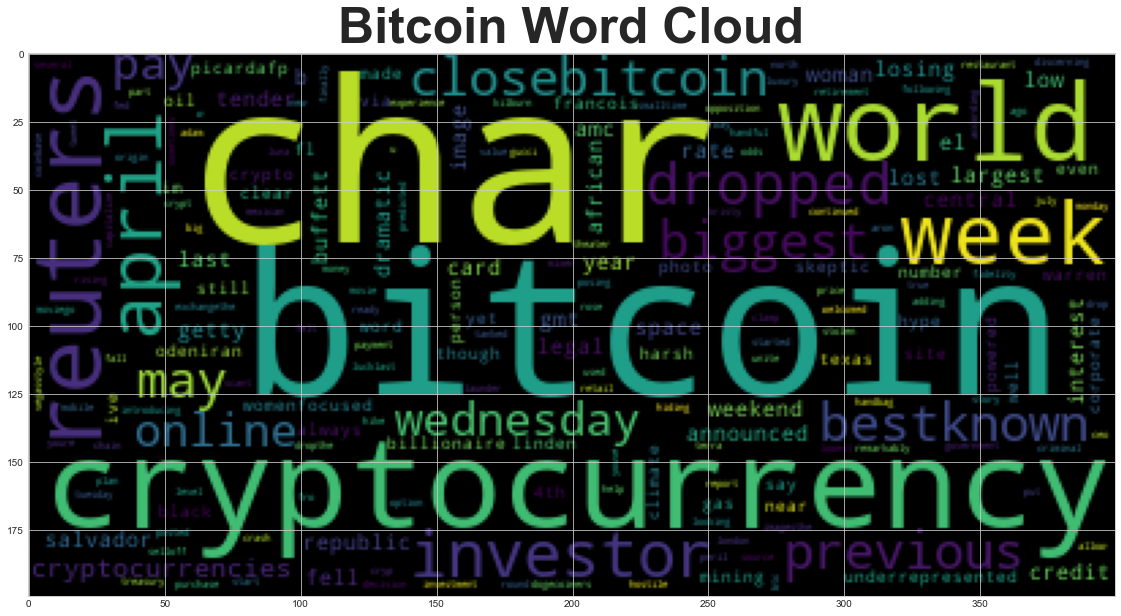

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

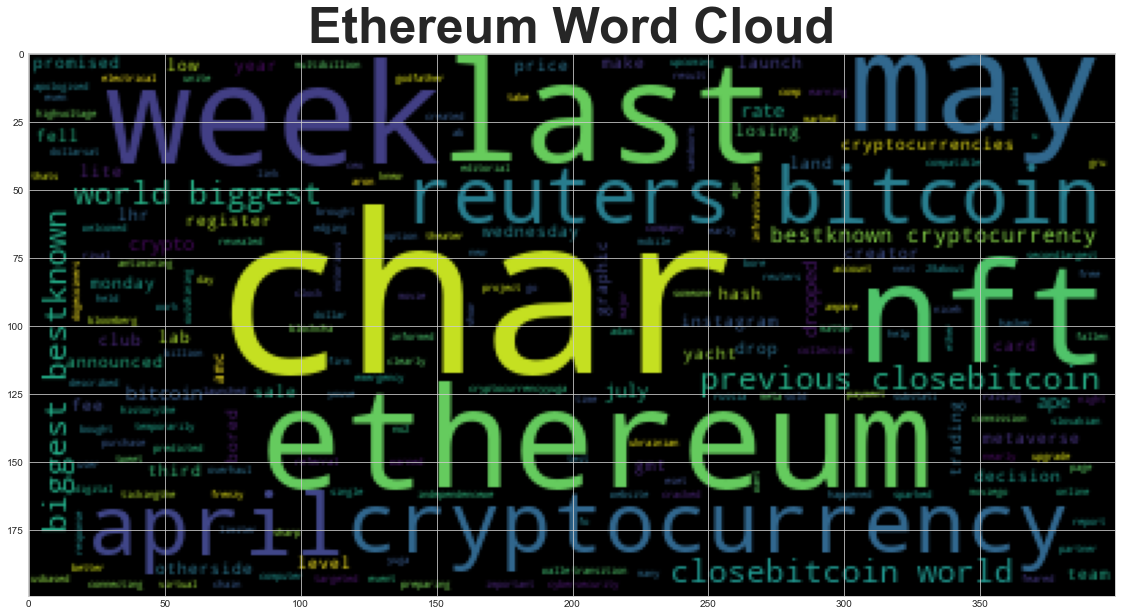

In [26]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 2.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_news_sentiment['content'])

In [31]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Warren Buffett PERSON
the weekend DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
May 10 DATE
Reuters ORG
The Ce

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_news_sentiment['content'])

In [35]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(doc, style='ent')

In [37]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Meta ORG
Instagram ORG
US GPE
Instagram ORG
Ethereum ORG
Yuga Labs PERSON
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
+6669 ORDINAL
April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
Last night TIME
Bloomberg GPE
nearly a third CARDINAL
a billion dollars MONEY
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
16% PERCENT
year DATE
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% 